# Водораздел
http://cmm.ensmp.fr/~beucher/wtshed.html

In [2]:
%matplotlib inline
import cv2
import numpy  as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('data/coins.jpg')

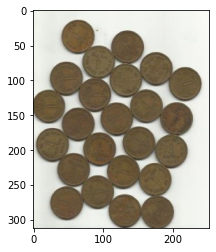

In [4]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Сегментируем по порогу

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, 
                          cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [10]:
ret

162.0

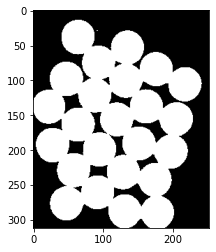

In [9]:
plt.imshow(thresh, cmap='gray')

# Применяем операцию dilate

In [22]:
# sure background area
kernel = np.ones((3,3),np.uint8)
sure_bg = cv2.dilate(thresh,kernel,iterations=3)

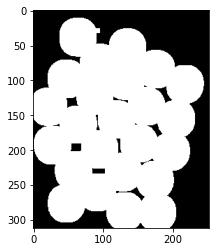

In [23]:
plt.imshow(sure_bg, cmap='gray')

# Для каждого пиксела вычисляем расстояние до ближайшей грани

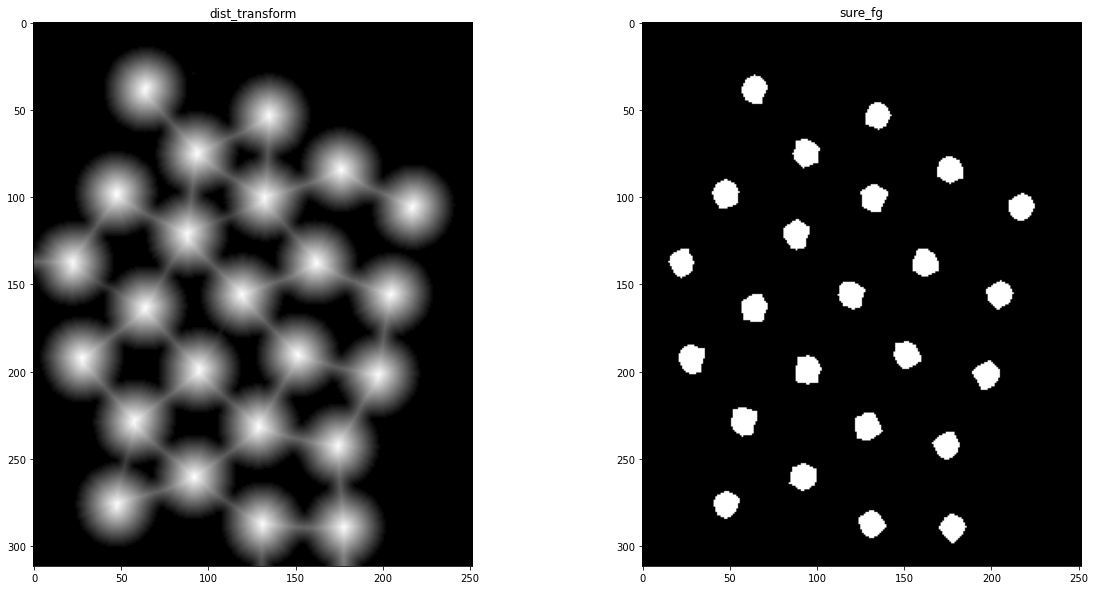

In [24]:
dist_transform = cv2.distanceTransform(thresh,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

fig = plt.figure(figsize=(20, 10))

subplot = fig.add_subplot(1, 2, 1)
plt.imshow(dist_transform, cmap='gray');
subplot.set_title('dist_transform');

subplot = fig.add_subplot(1, 2, 2)
plt.imshow(sure_fg, cmap='gray');
subplot.set_title('sure_fg');

# Получаем маску областей неопределенности

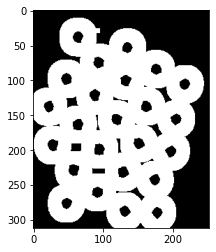

In [25]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
plt.imshow(unknown, cmap='gray')

 # Задаем маркеры начального приближения

In [26]:
# объединяем соседние пиксели в связанные компоненты
# в результате, для каждого пикселя известен номер связанной компоненты
# для пиксела фона (с нулевой интенсивностью) номер компоненты равен 0
ret, markers = cv2.connectedComponents(sure_fg)
# инкрементируем значения компонент на единицу, у фона теперь кластер 1
markers = markers + 1
# неизвестную область обозначаем свободной
markers[sure_fg!=255] = 0

In [28]:
markers.shape

(312, 252)

In [30]:
ret

25

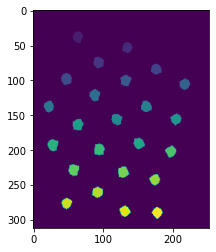

In [29]:
plt.imshow(markers)

In [32]:
np.unique(markers)

array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25], dtype=int32)

# Применяем алгоритм watershed (Водораздела)

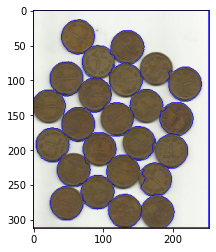

In [40]:
plt.imshow(img[:, :, ::-1])

In [41]:
markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]

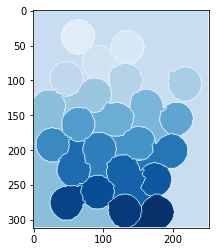

In [42]:
plt.imshow(markers, cmap=plt.cm.Blues)

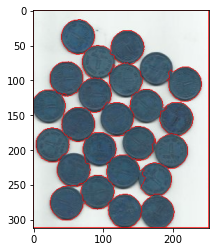

In [43]:
plt.imshow(img)

In [45]:
len(np.unique(markers))

25

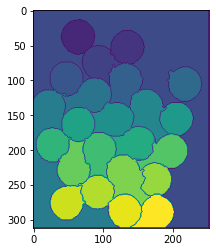

In [46]:
plt.imshow(markers)